# Mini-Challenge Michelle Rohrer Part 4

Von der belgischen Grenze in Lille geht es nun schon wieder zurück in die Schweiz. Doch neben den wunderschönen Kirchen gibt es noch eine weitere Sehenswürdigkeit, welche man in Frankreich gesehen haben muss: Disneyland Schloss. Bevor es also wieder in die Schweiz geht, habe ich noch einen Zwischenstopp in Chessy eingelegt.

Ich habe das Schloss leider nur bei Nacht sehen können und somit konnte ich die Strukturen des Schlosses nicht erkennen. Damit ich mir die Architektur besser anschauen kann, werder ich verschiedene Spektralfilter anwenden.

1. Der Low-Pass Filter lässt nur niedrige Frequenzen durch und filtert die hohen heraus, dabei wird das Bild geglättet, sodass nur die groben Strukturen erhalten bleiben.

In [13]:
# Implementation Spektralfilter
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift

def spectral_filter_2d(image, cutoff_freq):
    fft_image = fft2(image)
    fft_image_shifted = fftshift(fft_image)

    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow - cutoff_freq:crow + cutoff_freq, ccol - cutoff_freq:ccol + cutoff_freq] = 1

    filtered_fft_image = fft_image_shifted * mask

    filtered_fft_image_shifted_back = fftshift(filtered_fft_image)
    filtered_image = ifft2(filtered_fft_image_shifted_back).real
    
    return filtered_image

# Änderung

Das Disneyland-Schloss ist ein ikonisches Bauwerk, das durch seine komplexe Architektur und feinen Details besticht. Gerade in der Bildverarbeitung und Architekturanalyse stellt sich oft die Frage, wie Strukturen und Details eines so detaillierten Objekts extrahiert und klar sichtbar gemacht werden können. Die Spektralfilterung bietet hier eine wertvolle Methode, um verborgene Strukturen hervorzuheben und unerwünschte Bildstörungen zu reduzieren, ohne die Grundstruktur des Bildes zu verändern.

In dieser Analyse zielte ich darauf ab, spezifische architektonische Merkmale des Schlosses – wie die vertikalen und horizontalen Linien, die Symmetrie der Türme und die texturierten Fassadenelemente – genauer zu untersuchen. Da das Originalbild bei Nacht aufgenommen wurde, enthalten die Aufnahmen eine Reihe von Herausforderungen: schwache Lichtquellen, möglicherweise ungleichmäßige Belichtung und Bildrauschen, das Details überdecken kann.

In [2]:
import PIL.Image as Image
image = Image.open('IMG_4004.jpeg').convert('L')

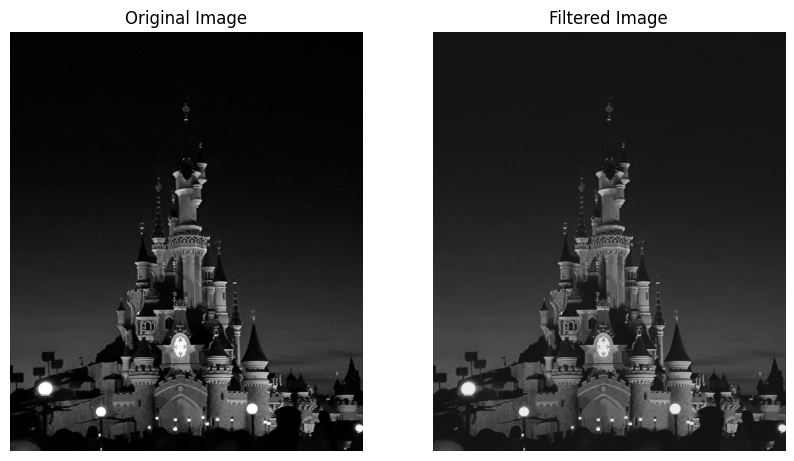

In [3]:
# spectralfilter anwenden
image = np.array(image)
image_low = spectral_filter_2d(image, 500)

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(image_low, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()

2. Der vertikale Filter unterdrückt horizontale Strukturen und hebt die vertikalen hervor. Dadurch werden die vertikalen Strukturen, wie Türme und Fassaden deutlocher dargestellt.

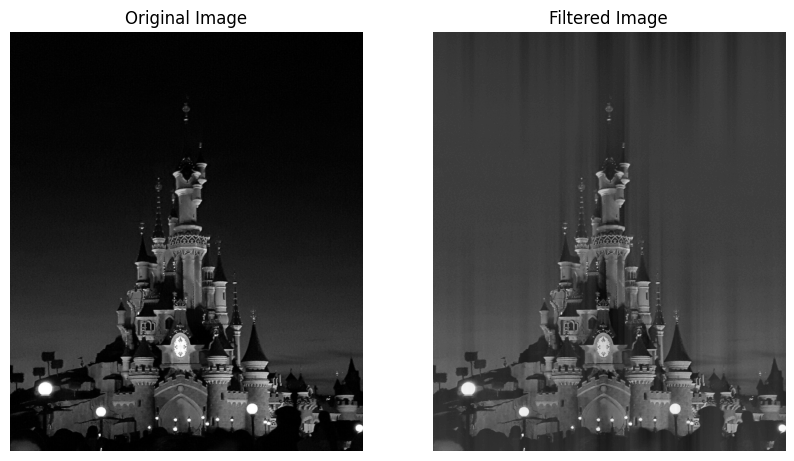

In [12]:
def spectral_filter_2d_vertical(image, cutoff_width):
    fft_image = fft2(image)
    fft_image_shifted = fftshift(fft_image)

    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    
    mask = np.ones((rows, cols), np.uint8)
    mask[crow - cutoff_width:crow + cutoff_width, :] = 0 
    
    filtered_fft_image = fft_image_shifted * mask
    filtered_fft_image_shifted_back = fftshift(filtered_fft_image)
    filtered_image = ifft2(filtered_fft_image_shifted_back).real
    
    return filtered_image

image_vertical = spectral_filter_2d_vertical(image, 1)

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(image_vertical, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()

# Änderung

Durch die Anwendung des Filters konnten gewisse Details, die im Originalbild nur schwach erkennbar waren, deutlicher hervorgehoben werden. Insbesondere die Konturen der Türme und die Symmetrie der Fassade treten im gefilterten Bild klarer hervor, was einen Mehrwert für die Analyse der komplexen Architektur darstellt. Die Filterung leistete hier wertvolle Dienste, indem sie den visuellen Fokus auf relevante Bilddetails lenkte und das Rauschen in den dunklen Bildbereichen reduzierte.

Jedoch zeigte sich, dass die Spektralfilterung auch gewisse Herausforderungen mit sich brachte. Im zweiten gefilterten Bild sind vertikale Artefakte sichtbar, die durch den Filterprozess entstanden sind. Diese Artefakte können bei einer strukturellen Analyse störend sein, da sie zusätzliche Linien und Schatten erzeugen, die nicht Teil des tatsächlichen Bauwerks sind. Die Artefakte könnten von Frequenzkomponenten des Bildes herrühren, die durch den Filterprozess unerwartet verstärkt wurden. Dies mindert die Qualität der Analyse, da die künstlichen Linien die echten architektonischen Details teilweise überlagern und verfälschen.

### Schlussbewertung

In diesem Part habe verschiedene Spektralfilter eingesetzt, um die architektonische Details des Disneyland Schlosses besser sichtbar zu machen. Durch die schlechte Belichtung sind feine Strukturen schwer sichtbar. 

Neben dem Low-Pass Filter, der große Strukturen durch das Glätten hoher Frequenzen betont, kam auch ein vertikaler Filter im Vergleich zum Einsatz. Dieser hebt vertikale Elemente im Bild hervor, um spezifische architektonische Details deutlicher zu machen. Beide Filter wurden durch die Anwendung der schnellen Fourier-Transformation (FFT) auf das Bild im Frequenzbereich realisiert. 

Insgesamt lässt sich sagen, dass die Spektralfilterung in der ersten Abbildung erfolgreich war, um die Strukturen hervorzuheben und das Bildrauschen zu reduzieren. Diese Filterung ermöglichte eine gezieltere Betrachtung der Architektur und hebt die vertikalen und horizontalen Elemente klar hervor, was besonders für die Untersuchung von Symmetrie und Design wertvoll ist. Der Filter unterstützte damit mein Ziel, eine detaillierte Analyse des Schlosses durchzuführen.

Im zweiten Bild haben die Filterparameter jedoch zu stärkeren Bildartefakten geführt, was auf Verbesserungsbedarf in der Filtereinstellung hindeutet. Ein potenzieller Ansatz wäre es, die Filterparameter anzupassen oder alternative Filtermethoden zu testen, die weniger anfällig für solche Artefakte sind. Ein adaptiver Spektralfilter könnte hier möglicherweise bessere Ergebnisse erzielen, indem er spezifische Frequenzbereiche dynamischer anpasst und so unnötige Artefakte reduziert.

# Änderung Ende